# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [ ]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...

Сейчас создадим приближения ньютоновским способом: 
$x_n = x_{n-1} - \dfrac{f(x_{n-1})}{f'(x_{n-1})}$


Процесс приближения останавливается, когда:
$|x_n - x_{n-1}| < \epsilon$

In [338]:
import numpy as np
def new_it(f, fder, x0, eps=1e-5, maxiter=1000):
    n = 0
    x_n = x0 - f(x0)/fder(x0)#приближение Ньютона
    x_0 = x0
    while np.abs(x_n - x_0) > eps and n < maxiter: #критерий остановки метода
        x_0 = x_n 
        x_n = x_n - f(x_n)/fder(x_n)
        n = n + 1
    return x_n,n

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

Создадим функцию $f(x) = x^2 - 1$

In [339]:
def f(x):
    return x**2 - 1

Создадим производную $f'(x) = 2x$

In [340]:
def fder(x):
    return 2*x

In [346]:
print("Корень уравнения : x =" ,new_it(f, fder, 2, eps=1e-10, maxiter=1000)[0])
print("Количество итераций : n =", new_it(f, fder, 2, eps=1e-10, maxiter=1000)[1])

Корень уравнения : x = 1.0
Количество итерация : n = 5


In [388]:
print("Корень уравнения : x =" ,new_it(f, fder, -2, eps=1e-10, maxiter=1000)[0])
print("Количество итераций : n =", new_it(f, fder, -2, eps=1e-10, maxiter=1000)[1])

Корень уравнения : x = -1.0000000000597362
Количество итераций : n = 34


Можно заметить, что этот метод дает только один корень(к которому мы находимся ближе)

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [354]:
def new(m,f, fder, x0, eps=1e-5, maxiter=1000):
    x_0 = x0
    n = 0
    x_n = x0 - m*f(x0)/fder(x0) #тут все делается также, как и раньше, только критерий остановки будет немного другой
    while np.abs(x_n - x_0) > eps and n < maxiter and fder(x_n) !=0: #тут следует добавить ограничение на ноль произодной
                                                                     #потому что в нашем случае обнуление производной говорит
                                                                     #об нахождении корня. Все остальное анологично
        x_0 = x_n
        x_n = x_n - m * f(x_n)/fder(x_n)
        n = n + 1
    return x_n, n

In [355]:
def f(x):
    return (x**2-1)**2

In [356]:
def fder(x):
    return 4*x*(x**2-1)

In [357]:
for i in range(1,6):
    print("m =", i)
    print("Корень уравнения: x = ",new(i,f, fder, 100, eps=1e-10, maxiter=1000)[0])
    print("Количество итераций: n =", new(i,f, fder, 100, eps=1e-10, maxiter=1000)[1])

m = 1
Корень уравнения: x =  1.0000000000608014
Количество итераций: n = 48
m = 2
Корень уравнения: x =  1.0
Количество итераций: n = 10
m = 3
Корень уравнения: x =  1.000000000017601
Количество итераций: n = 36
m = 4
Корень уравнения: x =  0.010000000000019327
Количество итераций: n = 1000
m = 5
Корень уравнения: x =  -13.702575417504164
Количество итераций: n = 1000


Можно увидеть, что в нашем случае кратность корня равна 2. Это согласуется с практикой. При $m=2$ корень находится быстрее    всего( количество итераций минимально). При больших $m$ метод не будет сходиться,так как будет вечно "промахиваться".

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

In [60]:
def f1(x): #создаем функцию, которая при подстановке корня будет давать 0
    return np.sqrt(x) - np.cos(x) 

In [68]:
import matplotlib.pyplot as plt

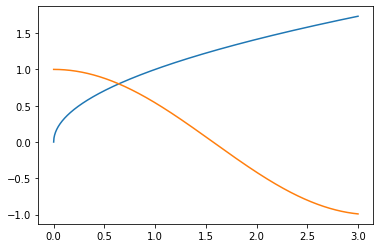

In [359]:
plt.figure()
x = np.linspace(0,3,1000)
plt.plot(x,np.sqrt(x))
plt.plot(x,np.cos(x))

Из графика видно, что корень находится в интервале $(0,1)$

\begin{equation} 
    \phi(x) = x - \alpha f(x) \\
    f(x) = \sqrt{x} - \cos(x) \Longrightarrow x_n = x_{n-1} - \alpha * f(x_{n-1})
\end{equation}



Создадим функцию $\phi(x)$, которая будет устроена по тому же принципу, что и раньше

In [319]:
def iter1(x0,a,eps=1e-5,maxiter = 1000):
    x_0 =x0
    x_n = x_0 - a*(np.sqrt(x_0) - np.cos(x_0))
    n = 0
    while np.abs(x_n - x_0) > eps and n < maxiter:
        x_0 = x_n
        x_n = x_n - a*(np.sqrt(x_n) - np.cos(x_n))
        n = n+1
    return x_n,n

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


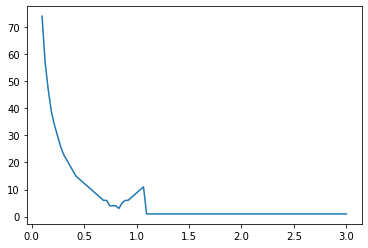

In [362]:
x = np.linspace(0.1,3,100) #начинаем не с 0, чтобы nan производная не выдала
y = [iter1(2,x[i])[1] for i in range(len(x))]
plt.figure()
plt.plot(x,y)

Видим, что при значениях $a$
$$
a:(a> ~1.2)
$$  
Начинает все ломаться, проверим, что происходит в этот момент

In [363]:
def iter1(x0,a,eps=1e-5,maxiter = 1000):
    x_0 =x0
    x_n = x_0 - a*(np.sqrt(x_0) - np.cos(x_0))
    n = 0
    while np.abs(x_n - x_0) > eps and n < maxiter:
        print(x_n)
        x_0 = x_n
        x_n = x_n - a*(np.sqrt(x_n) - np.cos(x_n))
        n = n+1
    return x_n,n

In [366]:
x = np.linspace(0.1,3,100)
y = [iter1(2,x[i])[1] for i in range(len(x))]

1.8169639601079761
1.6578002621817336
1.5203552484441434
1.4020945311508335
1.3004747301157031
1.2131405080542828
1.1380057857523191
1.0732689999730163
1.0173957131036118
0.9690880083049415
0.9272508990270537
0.8909605766113903
0.8594363984978309
0.83201705445218
0.8081406796354953
0.7873284267817058
0.7691709538570634
0.7533173170999211
0.7394658261599422
0.7273564913501813
0.7167647610700609
0.7074963060346888
0.6993826553797353
0.6922775288454339
0.6860537404476882
0.6806005737485804
0.6758215483366586
0.6716325125125948
0.6679600093374337
0.6647398728456047
0.6619160189072103
0.6594394013744889
0.6572671090989078
0.655361583415319
0.6536899389566365
0.652223373340243
0.6509366534749941
0.6498076680681197
0.648817037437151
0.6479477730103634
0.6471849799753144
0.6465155974448125
0.6459281712818714
0.6454126553830541
0.6449602377818863
0.6445631884160342
0.64421472581626
0.6439089003321478
0.6436404918178356
0.6434049199676504
0.6431981657226256
0.6430167023694351
0.64285743512757
0.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


Видим, что начиная, с какого-то $a$ наше вычитание $a*f(x)$ приводит к отрицательному значению, из-за чего происходит ошибка во время вычисления корня, из-за чего все ломается. Посмотрим, что будет происходить до таких значений. Возьмем интервал $(0,1)$ .

In [367]:
def iter1(x0,a,eps=1e-5,maxiter = 1000):
    x_0 =x0
    x_n = x_0 - a*(np.sqrt(x_0) - np.cos(x_0))
    n = 0
    while np.abs(x_n - x_0) > eps and n < maxiter:
        x_0 = x_n
        x_n = x_n - a*(np.sqrt(x_n) - np.cos(x_n))
        n = n+1
    return x_n,n

In [379]:
def der1(x):
    return 0.5/np.sqrt(x) + np.sin(x) # производная нашей функции

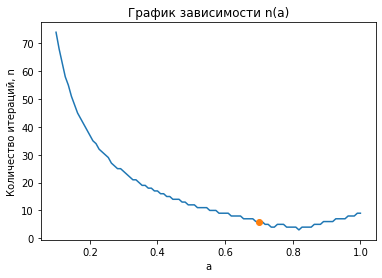

In [387]:
x = np.linspace(0.1,1,100)
y = [iter1(2,x[i])[1] for i in range(len(x))] #наполняем массив из количества итераций
der_0 = [der1(x[i]) for i in range(len(x))] #наполним массив из производных для отрезка x
m = min(der_0) 
M = max(der_0)
#найдем минимальное - m и максимальное - M
plt.figure()
plt.title('График зависимости n(a)')
plt.xlabel('a')
plt.ylabel('Количество итераций, n')
plt.plot(x,y)
plt.plot(2 / (m + M),iter1(2,2/(m+M))[1] , 'o')


Получили, что при увеличении $a$ до какой-то точки оно уменьшается, а потом начинает возрастать. А оранжевая точка, это количество итераций при $a = \dfrac{2}{m+M}$. В принципе эта точка находится близко к тому значению $a$, при котором метод быстрее всего сходится.

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

Зададим точки, которые являются решениями нашего кубического уравнения

In [403]:
z1 = np.cos(0) +1j*np.sin(0)
z2 = np.cos(2*np.pi/3) +1j*np.sin(2*np.pi/3)
z3 = np.cos(4*np.pi/3) +1j*np.sin(4*np.pi/3)

In [404]:
def f1(x): # наша функция
    return x**3 - 1

In [405]:
def der_f1(x): # ее производная
    return 3*x**2

In [424]:
x = np.linspace(-10,10,100)  # создаем сетку, на которой будем изображать наши фракталы, не берем очень много
y = np.linspace(-10,10,100)  # потому что создается она очень долго

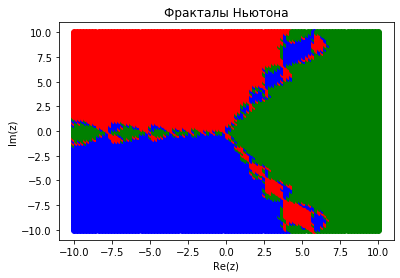

In [428]:
plt.figure()
for i in range(len(x)): #пробегаемся по всем точкам
    for k in range(len(y)):
        z = new_it(f1,der_f1,x[i]+1j*y[k], eps=1e-5, maxiter=100)[0] #находим куда сходится наше решение в зависимости
                                                                     #от начальных координат (x[i],j[k])
        if np.abs(z-z1)<1e-2: #а потом находим, к какому корню относится точка и закрашиваем в определенный цвет
            plt.plot(x[i],y[k],'o',color = 'g')
        if np.abs(z-z2)<1e-2:
            plt.plot(x[i],y[k],'o',color = 'r')
        if np.abs(z-z3)<1e-2:
            plt.plot(x[i],y[k],'o',color = 'b')
plt.title('Фракталы Ньютона')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show()